# U3: Ejemplo de face detection

### Lo más básico (Haar Cascades)

OpenCV ofrece una forma tradicional pero efectiva de detección facial utilizando Haar Cascades. Aunque puede no ser tan avanzado como algunos métodos basados en aprendizaje profundo en términos de precisión y velocidad, sigue siendo popular para proyectos con requisitos menos estrictos o donde la simplicidad y la velocidad de implementación son clave.

In [1]:
#!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt

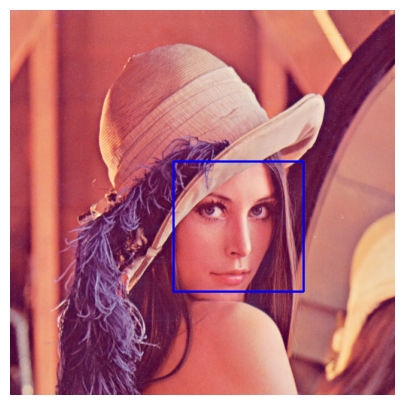

In [4]:
# Cargar el clasificador preentrenado para caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Leer la imagen
image = cv2.imread('Lenna.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detectar caras en la imagen
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Dibujar rectángulos alrededor de las caras detectadas
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Muestra la imagen con los rostros detectados
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Ahora con MediaPipe

MediaPipe es una biblioteca de procesamiento de medios de código abierto de Google que facilita la construcción de aplicaciones de visión por computadora. Ofrece varias soluciones preconstruidas, incluida una para el reconocimiento facial.

In [5]:
#!pip install mediapipe

### Reconocimiento en una imagen

In [3]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

2025-02-04 00:13:27.469065: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Inicializar el detector de rostros. Usaremos el modelo de detección precisa en este ejemplo.
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [8]:
image_path = 'Lenna.png'  # Reemplaza esto con la ruta a tu imagen
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Procesa la imagen
results = face_detection.process(image_rgb)

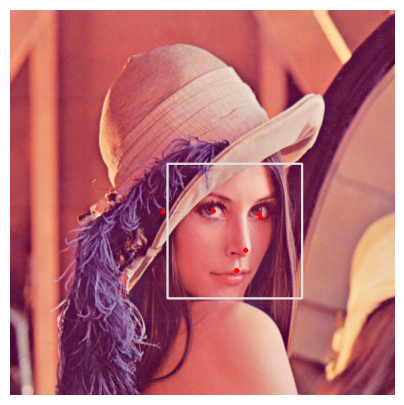

In [9]:
if results.detections:
    for detection in results.detections:
        mp_drawing.draw_detection(image, detection)

# Muestra la imagen con los rostros detectados
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Reconocimiento desde un vídeo

In [5]:
video_path = 'video_faces.mp4'  # Reemplaza esto con la ruta a tu video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error al abrir el video")
else:
    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        while True:
            success, image = cap.read()
            if not success:
                print("Fin del video.")  # Indica el fin del video y sale del bucle
                break

            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = face_detection.process(image)

            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            if results.detections:
                for detection in results.detections:
                    mp_drawing.draw_detection(image, detection)

            cv2.imshow('Face Detection in Video', image)

            if cv2.waitKey(1) & 0xFF == ord('q'):  # Permite la opción de terminar prematuramente con la tecla 'q'
                break

    cap.release()
    cv2.destroyAllWindows()

Fin del video.


### Live recognition

In [3]:
cap = cv2.VideoCapture(0)  # Cambia '0' si tu cámara no es la predeterminada

with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            continue

        # Convierte la imagen de BGR a RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Detección de rostros
        results = face_detection.process(image)

        # Dibuja los resultados de la detección
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.detections:
            for detection in results.detections:
                mp_drawing.draw_detection(image, detection)

        cv2.putText(image, "Presiona una tecla para terminar", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                
        # Muestra la imagen
        cv2.imshow('Face Detection', image)
        if cv2.waitKey(1) != -1:  # Si se presiona cualquier tecla, termina la ejecución
            break

cap.release()
cv2.destroyAllWindows()

### Face mesh landmarks

In [4]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# Importa las utilidades de dibujo y los estilos de dibujo de MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

mp_face_mesh = mp.solutions.face_mesh

# Inicializa FaceMesh
face_mesh = mp_face_mesh.FaceMesh(
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

cap = cv2.VideoCapture('video_faces.mp4')  # Reemplaza esto con la ruta a tu video

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Fin del video o error al cargar el archivo.")  # Finaliza el bucle si no se pudo leer el video
        break

    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    
    # Detección de puntos de referencia faciales
    results = face_mesh.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

    cv2.imshow('Face Landmark Detection', image)
    if cv2.waitKey(1) & 0xFF == 27:  # Presiona ESC para salir
        break

cap.release()
cv2.destroyAllWindows()

Fin del video o error al cargar el archivo.


### Guardando los landmarks en un csv

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

Iniciemos almacenando solo el bounding box (relativo a la imagen):

In [6]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# Función para procesar la imagen y almacenar detecciones
def process_image(image_path, csv_filename="boundingbox_image.csv"):
    image = cv2.imread(image_path)
    if image is None:
        print(f"No se pudo cargar la imagen desde {image_path}.")
        return
    
    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    detections_data = []

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        # Realizar detección de rostros
        results = face_detection.process(image)

        # Extraer información de la detección
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                xmin = bboxC.xmin
                ymin = bboxC.ymin
                width = bboxC.width
                height = bboxC.height
                
                detections_data.append({
                    "xmin": xmin,
                    "ymin": ymin,
                    "width": width,
                    "height": height
                })

    # Convertir los datos en un DataFrame y guardar en un CSV
    df = pd.DataFrame(detections_data)
    df.to_csv(csv_filename, index=False)
    print(f"Detections stored in {csv_filename}")

# Llamar a la función con la ruta a tu imagen
process_image('Lenna.png')

Detections stored in boundingbox_image.csv


Ahora los landmarks relativos al bounding box:

In [8]:
mp_face_detection = mp.solutions.face_detection

# Función para procesar la imagen y almacenar detecciones y landmarks relativos
def process_image(image_path, csv_filename="landmarks_image.csv"):
    image = cv2.imread(image_path)
    if image is None:
        print("Error al cargar la imagen.")
        return
    
    # Convertir la imagen de BGR a RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape  # Altura y anchura de la imagen para cálculos relativos

    detections_data = []

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(image)

        # Extraer información de la detección y los landmarks
        if results.detections:
            for detection in results.detections:
                bboxC = detection.location_data.relative_bounding_box
                xmin = bboxC.xmin
                ymin = bboxC.ymin
                width = bboxC.width
                height = bboxC.height

                # Inicializar un diccionario para almacenar las coordenadas de los landmarks relativos al bounding box
                landmarks_relative = {}

                # Extraer landmarks
                keypoints = detection.location_data.relative_keypoints
                for i, keypoint in enumerate(keypoints):
                    # Calcular coordenadas relativas dentro del bounding box
                    relative_x = (keypoint.x - xmin) / width
                    relative_y = (keypoint.y - ymin) / height

                    # Asumiendo que quieres nombrar cada landmark según su índice
                    landmarks_relative[f"landmark_{i}_x"] = relative_x
                    landmarks_relative[f"landmark_{i}_y"] = relative_y                                                
                
                detection_data = {
                    "xmin": xmin,
                    "ymin": ymin,
                    "width": width,
                    "height": height,
                }
                
                detection_data.update(landmarks_relative)
                detections_data.append(detection_data)

    df = pd.DataFrame(detections_data)
    df.to_csv(csv_filename, index=False)
    print(f"Detections and relative landmarks stored in {csv_filename}")

# Llamar a la función con la ruta a tu imagen
process_image('Lenna.png')

Detections and relative landmarks stored in landmarks_image.csv


Recuperar los landmarks del csv

In [10]:
# Ruta al archivo CSV
csv_filename = 'landmarks_image.csv'

# Leer el archivo CSV
df = pd.read_csv(csv_filename)

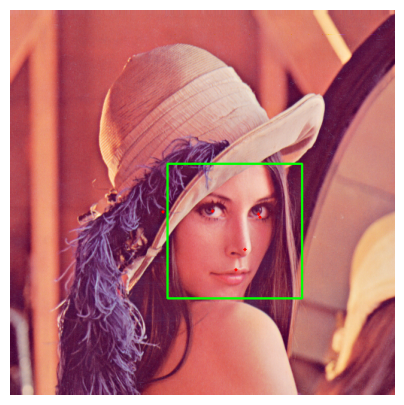

In [11]:
# Ruta a la imagen original
image_path = 'Lenna.png'
image = cv2.imread(image_path)

# Asegúrate de que la imagen se haya cargado correctamente
if image is None:
    print("Error al cargar la imagen.")
else:
    # Convertir dimensiones de la imagen a float para cálculos
    height, width, _ = image.shape

    for index, row in df.iterrows():
        # Extraer coordenadas del bounding box
        xmin = int(row['xmin'] * width)
        ymin = int(row['ymin'] * height)
        bbox_width = int(row['width'] * width)
        bbox_height = int(row['height'] * height)

        # Dibujar el bounding box
        cv2.rectangle(image, (xmin, ymin), (xmin + bbox_width, ymin + bbox_height), (0, 255, 0), 2)

        # Dibujar cada landmark
        for i in range(6):  # Ajusta este rango según el número de landmarks almacenados
            # Calcular las coordenadas absolutas de los landmarks
            landmark_x = int(row[f'landmark_{i}_x'] * bbox_width + xmin)
            landmark_y = int(row[f'landmark_{i}_y'] * bbox_height + ymin)

            # Dibujar el landmark
            cv2.circle(image, (landmark_x, landmark_y), 2, (0, 0, 255), -1)

    # Muestra la imagen con los rostros detectados
    plt.figure(figsize=(5, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()